## 5. Clustering
### 1. K-means
#### 1. Create the model

In [1]:
import pickle
import gensim.corpora as corpora
from gensim.models import TfidfModel

#LOAD LYRICS from disk
lyrics = list()
with open ('../dataset/lemma_lyrics', 'rb') as fp:
    lyrics = pickle.load(fp)

new_lyrics = list()
for lyric in lyrics:
    new_lyrics.append(' '.join(lyric))
    
print(lyrics[0])
print(new_lyrics[0])

lyrics = new_lyrics
del new_lyrics

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['be', 'not', 'ever', 'trap', 'bando', 'lord', 'do', 'not', 'get', 'wrong', 'know', 'couple', 'niggas', 'be', 'place', 'everybody', 'know', 'name', 'say', 'get', 'watch', 'attitude', 'see', 'money', 'man', 'start', 'actin', 'strange', 'fuck', 'fuck', 'never', 'say', 'be', 'brand_new', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'have', 'talkin', 'shit', 'nigga', 's', 'regular', 'have', 'love', 'thick', 'life', 'spectacular', 'spend', 'be', 'die', 'rich', 'nigga', 'be', 'flexin', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'see', 'wanna', 'hot', 'singer', 'swear', 'sound', 'start', 'bottom', 'far', 'motto', 'niggasll', 'never', 'drake', 'shout', 'ovo', 'prolly', 'do', 'not', 'know', 'stay', 'cut', 'do', 'not', 'fuck', 'body', 'that', 's', 'pun', 'nobody', 'know', 'name', 'runnin', 'dream', 'be', 'not', 'hard', 'break', 'bread', 'swear', 'pull', 'plate', 'eat', 'starve', 'be', 'winnin', 'crew', 'c

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
data = vectorizer.fit_transform(lyrics)
del lyrics

In [3]:
%%time
from sklearn.cluster import KMeans
import pickle

Sum_of_squared_distances = []
K = range(10, 200, 10)
for n_clusters in K:    
    tempModel = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=20, n_init=4)
    tempModel.fit(data)
    Sum_of_squared_distances.append(tempModel.inertia_)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\IPython\core\magics\execution.py", line 1246, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 8, in <module>
  File "C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\k_means_.py", line 968, in fit
    return_n_iter=True)
  File "C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\k_means_.py", line 380, in k_means
    random_state=random_state)
  File "C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\k_means_.py", line 546, in _kmeans_single_lloyd
    distances=distances)
  File "C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\k_means_.py", line 688, in _labels_inertia
    return labels, inertia
KeyboardInterrupt

During handling of the above exception, another excepti

KeyboardInterrupt: 

In [ ]:
tempModel = KMeans(n_clusters=200, init='k-means++', max_iter=20, n_init=4)
tempModel.fit(data)
Sum_of_squared_distances.append(tempModel.inertia_)

In [ ]:
import matplotlib.pyplot as plt
K2 = range(8, 48, 4)
plt.plot(K2, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

#save model
with open('../dataset/kmeans_model', 'wb') as fp:
    pickle.dump(model, fp)

In [ ]:
from sklearn.decomposition import TruncatedSVD

reduced_data = TruncatedSVD(n_components=2).fit_transform(data)

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100)
model.fit(reduced_data)

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


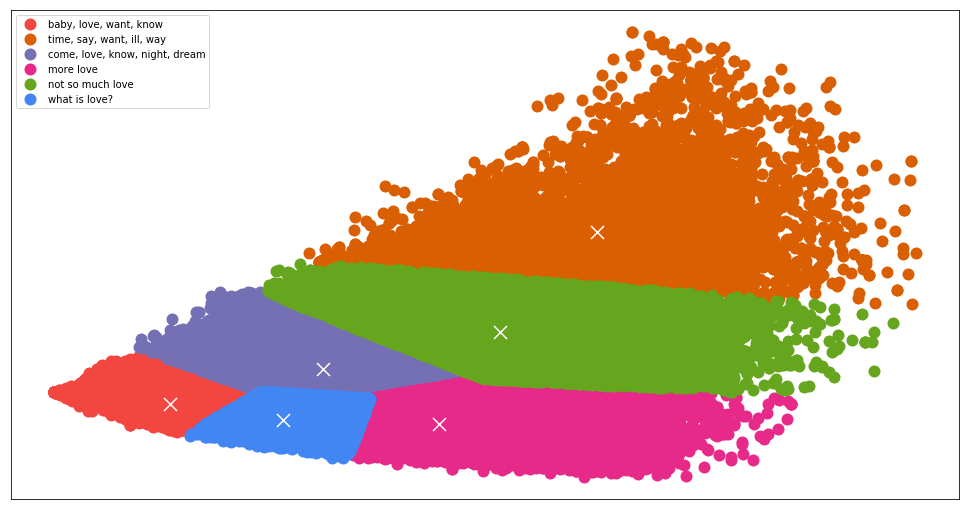

In [8]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

xs, ys = reduced_data[:, 0], reduced_data[:, 1]
#set up colors per clusters using a dict
cluster_colors = {0: '#f44641', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#4286f4'}

#set up cluster names using a dict
cluster_names = {0: 'baby, love, want, know', 
                 1: 'time, say, want, ill, way', 
                 2: 'come, love, know, night, dream', 
                 3: 'more love', 
                 4: 'not so much love', 
                 5: 'what is love?'}


#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=model.labels_.tolist())) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point    

# Plot the centroids as a white X
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    
plt.show() #show the plot